<a href="https://colab.research.google.com/github/JDVAR7/2123-ia-aplicada-a-data-science-construccion-de-visualizaciones/blob/main/Explorando_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importe de las diferentes Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [2]:
flights = pd.read_csv('/content/flights.csv')

# **Revisión de datos e información sobre el DataFrama**

In [11]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [12]:
flights.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [13]:
flights.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [14]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('winter')
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

# **IMplementación de graficaspara analisis del DataFrame**

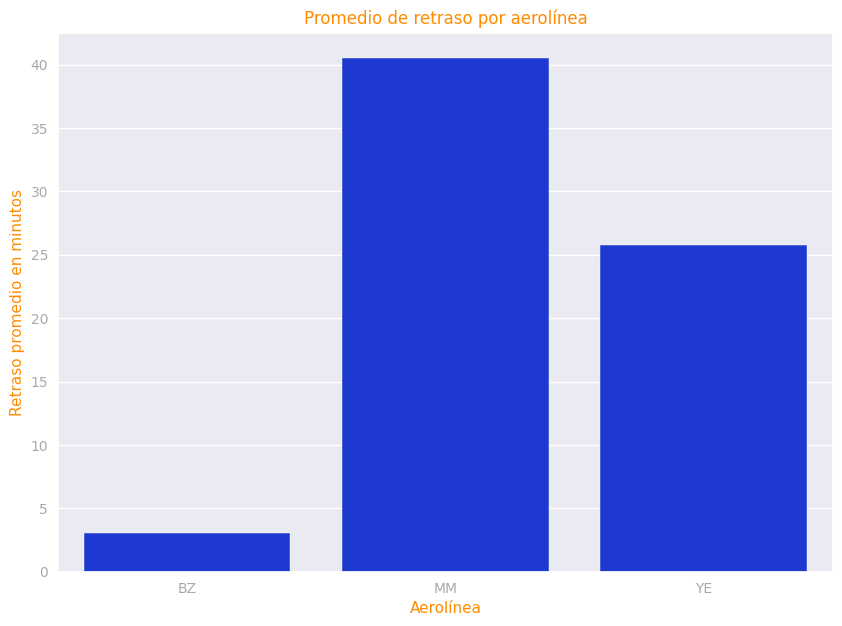

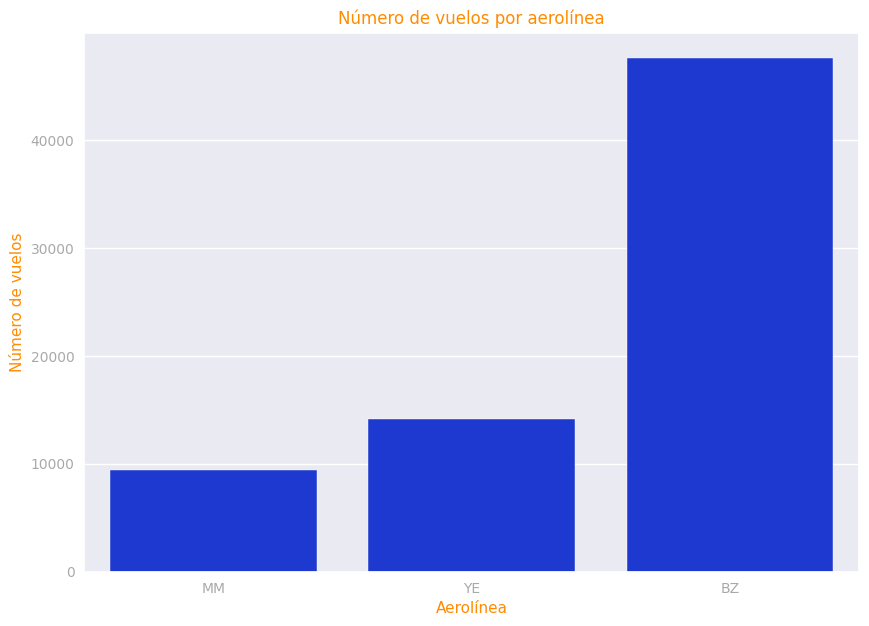

In [21]:
avg_delay = flights.groupby('airline')['delay'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 7))

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('darkgray')

sns.barplot(x='airline', y='delay', data=avg_delay, ax=ax)
plt.title('Promedio de retraso por aerolínea', color='darkorange')
plt.xlabel('Aerolínea', color='darkorange')
plt.ylabel('Retraso promedio en minutos', color='darkorange')
plt.show()

# For the second plot, create a new figure and axes to apply custom tick colors
fig2, ax2 = plt.subplots(figsize=(10, 7))
sns.countplot(x='airline', data=flights, ax=ax2)
plt.title('Número de vuelos por aerolínea', color='darkorange')
plt.xlabel('Aerolínea', color='darkorange')
plt.ylabel('Número de vuelos', color='darkorange')

# Change x-axis tick labels color for the second plot
for tick_label in ax2.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color for the second plot
for tick_label in ax2.get_yticklabels():
    tick_label.set_color('darkgray')

plt.show()

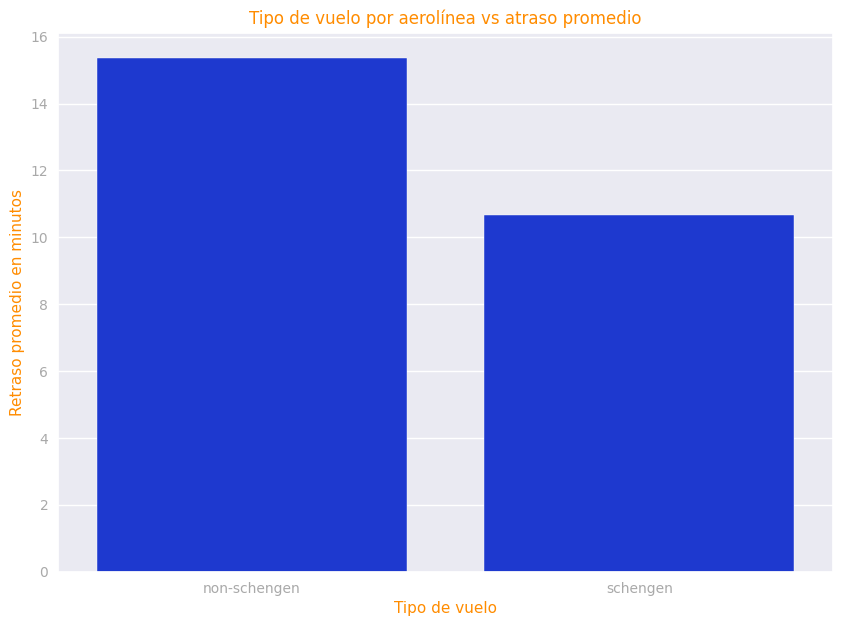

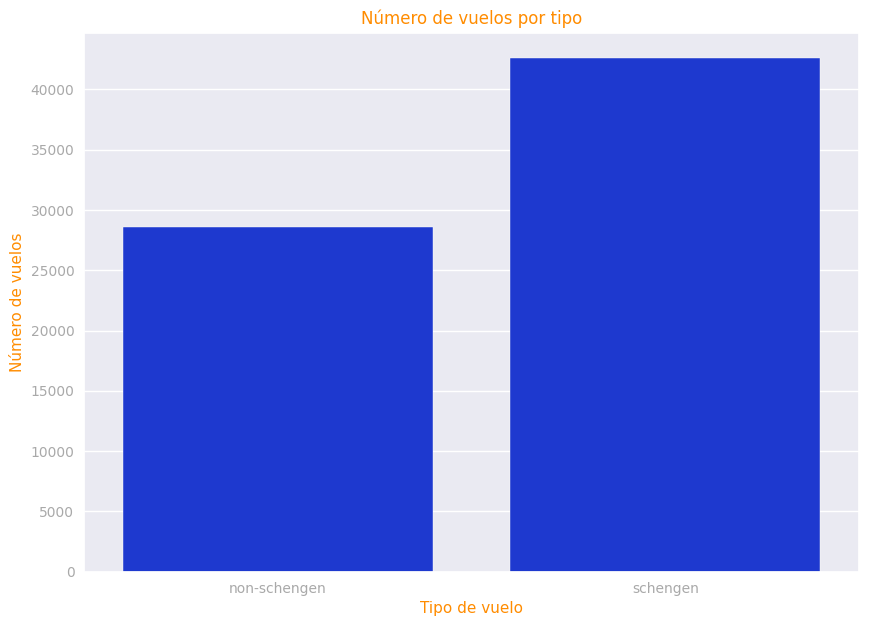

In [22]:
avg_delay = flights.groupby('schengen')['delay'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 7))

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('darkgray')

sns.barplot(x='schengen', y='delay', data=avg_delay, ax=ax)
plt.title('Tipo de vuelo por aerolínea vs atraso promedio', color='darkorange')
plt.xlabel('Tipo de vuelo', color='darkorange')
plt.ylabel('Retraso promedio en minutos', color='darkorange')
plt.show()

# For the second plot, create a new figure and axes to apply custom tick colors
fig2, ax2 = plt.subplots(figsize=(10, 7))
sns.countplot(x='schengen', data=flights, ax=ax2)
plt.title('Número de vuelos por tipo', color='darkorange')
plt.xlabel('Tipo de vuelo', color='darkorange')
plt.ylabel('Número de vuelos', color='darkorange')

# Change x-axis tick labels color for the second plot
for tick_label in ax2.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color for the second plot
for tick_label in ax2.get_yticklabels():
    tick_label.set_color('darkgray')

plt.show()

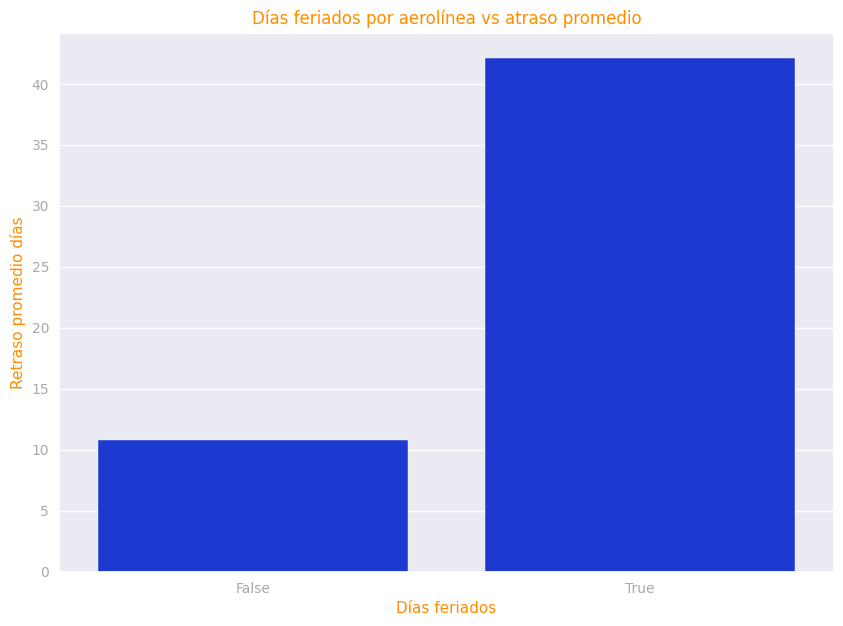

In [23]:
avg_delay = flights.groupby('is_holiday')['delay'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 7))

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('darkgray')

sns.barplot(x='is_holiday', y='delay', data=avg_delay, ax=ax)
plt.title('Días feriados por aerolínea vs atraso promedio', color='darkorange')
plt.xlabel('Días feriados', color='darkorange')
plt.ylabel('Retraso promedio días', color='darkorange')
plt.show()

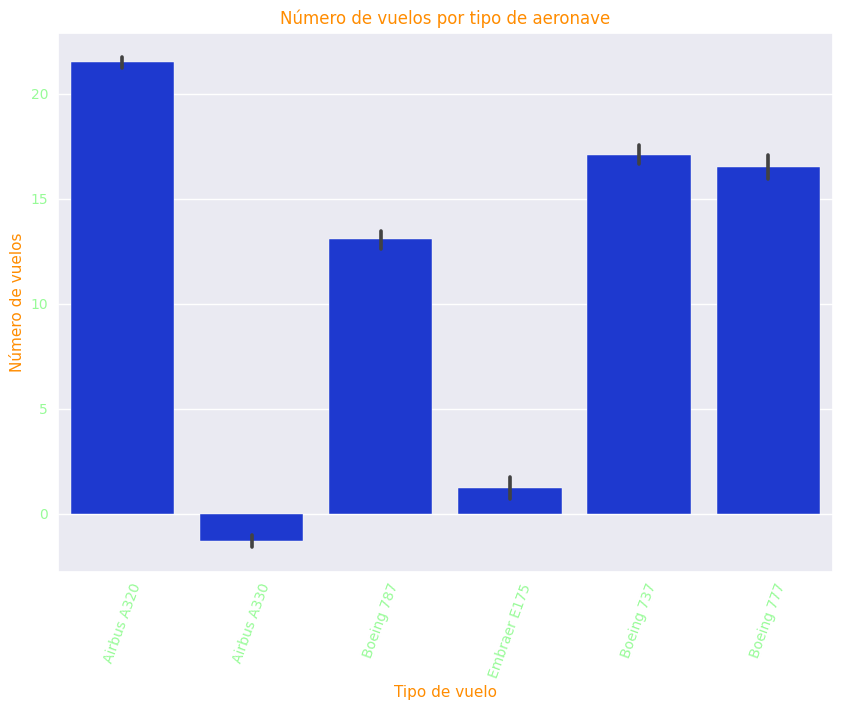

In [30]:
order = flights['aircraft_type'].value_counts().index

fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x='aircraft_type', y='delay', data=flights, order=order, ax=ax)
plt.title('Número de vuelos por tipo de aeronave', color='darkorange')
plt.xticks(rotation=70)
plt.xlabel('Tipo de vuelo', color='darkorange')
plt.ylabel('Número de vuelos', color='darkorange')

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('palegreen')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('palegreen')

plt.show()

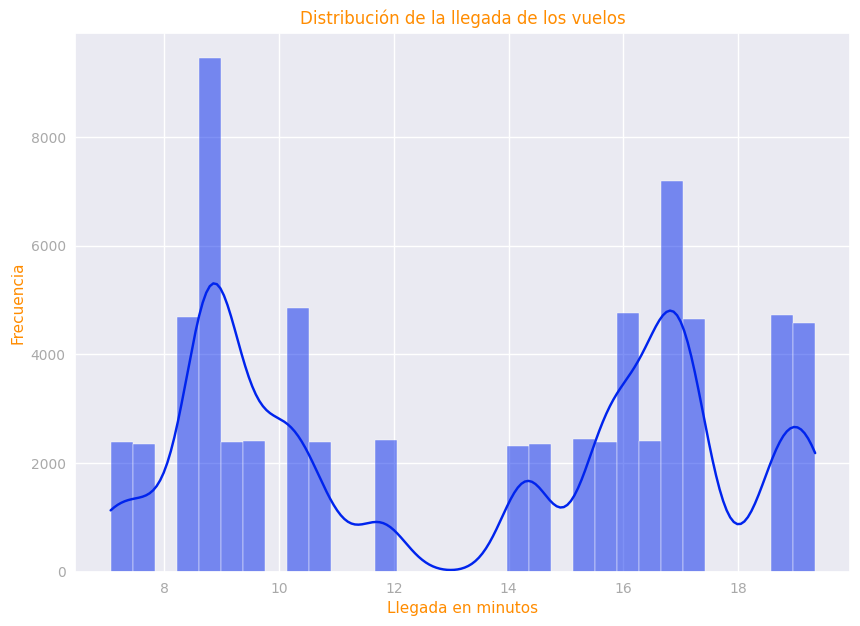

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(x='arrival_time', data=flights, kde=True, ax=ax)
plt.title('Distribución de la llegada de los vuelos', color='darkorange')
plt.xlabel('Llegada en minutos', color='darkorange')
plt.ylabel('Frecuencia', color='darkorange')

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('darkgray')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('darkgray')

plt.show()

[en.wikipedia.org/wiki/Freedman-Diaconis_rule](https://en.wikipedia.org/wiki/Freedman-Diaconis_rule)

# Consulta de la regla para evaluación de la formula y función del rango intercuantil

In [18]:
def ancho_bin(df, columna):
  q75, q25 = np.percentile(df[columna], [75, 25])
  iqr = q75-q25
  ancho = 2* iqr* np.power(len(df[columna]), -1/3)
  return ancho

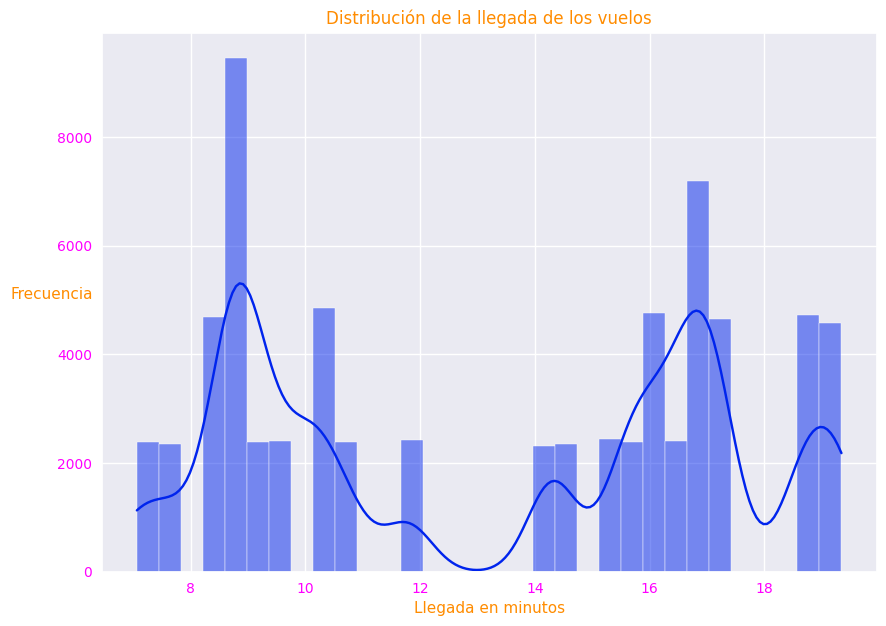

In [29]:
binwidth = ancho_bin(flights, 'arrival_time')
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(x='arrival_time', data=flights, kde=True, binwidth=binwidth, ax=ax)
plt.title('Distribución de la llegada de los vuelos', color='darkorange')
plt.xlabel('Llegada en minutos', color='darkorange')
plt.ylabel('Frecuencia', color='darkorange', rotation=0)

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('magenta')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('magenta')

plt.show()

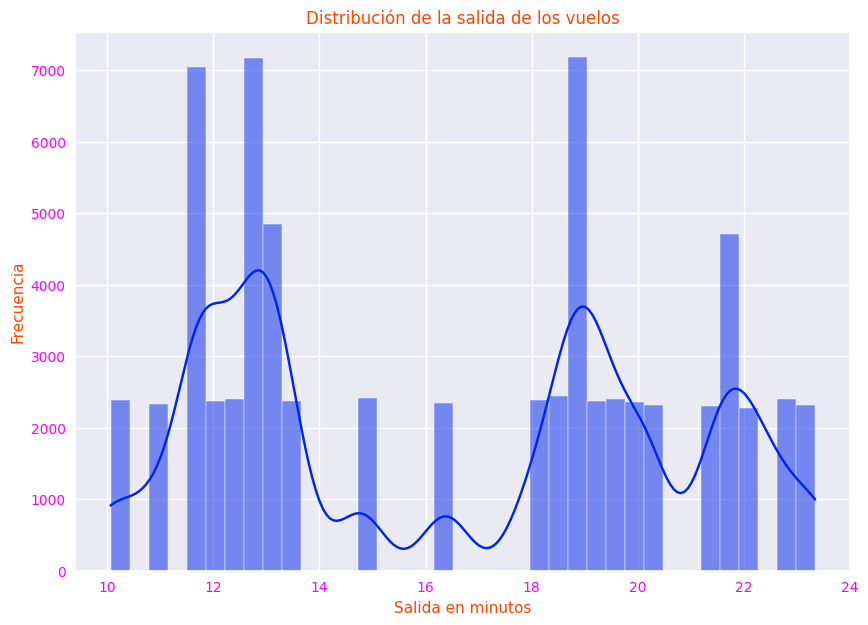

In [36]:
binwidth = ancho_bin(flights, 'departure_time')
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(x='departure_time', data=flights, kde=True, binwidth=binwidth, ax=ax)
plt.title('Distribución de la salida de los vuelos', color='orangered')
plt.xlabel('Salida en minutos', color='orangered')
plt.ylabel('Frecuencia', color='orangered')

# Change x-axis tick labels color
for tick_label in ax.get_xticklabels():
    tick_label.set_color('magenta')
# Change y-axis tick labels color
for tick_label in ax.get_yticklabels():
    tick_label.set_color('magenta')

plt.show()

In [37]:
atraso_promedio = flights['delay'].mean()
atraso_mediana = flights['delay'].median()

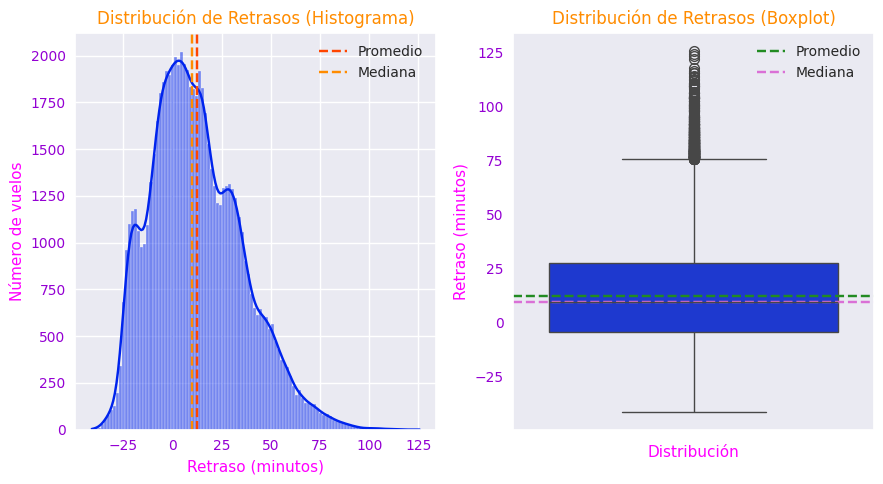

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))

# Plot 1: Histogram of 'delay'
sns.histplot(x='delay', data=flights, kde=True, ax=ax[0])
ax[0].set_title('Distribución de Retrasos (Histograma)', color='darkorange')
ax[0].axvline(x=atraso_promedio, color='orangered', label='Promedio', linestyle='--')
ax[0].axvline(x=atraso_mediana, color='darkorange', label='Mediana', linestyle='--')
ax[0].legend()
ax[0].set_xlabel('Retraso (minutos)', color='magenta')
ax[0].set_ylabel('Número de vuelos', color='magenta')

# Plot 2: Boxplot of 'delay' (now with delay on y-axis, vertical boxplot)
sns.boxplot(y='delay', data=flights, ax=ax[1])
ax[1].set_title('Distribución de Retrasos (Boxplot)', color='darkorange')
ax[1].axhline(y=atraso_promedio, color='forestgreen', label='Promedio', linestyle='--')
ax[1].axhline(y=atraso_mediana, color='orchid',  label='Mediana', linestyle='--')
ax[1].legend()
ax[1].grid(False) # Keep grid setting
ax[1].set_xlabel('Distribución', color='magenta') # X-label for vertical boxplot (categorical)
ax[1].set_ylabel('Retraso (minutos)', color='magenta') # Y-label for vertical boxplot

# Apply tick label colors to both subplots using a loop over the ax array
for subplot_ax in ax.flat:
    # Change x-axis tick labels color
    for tick_label in subplot_ax.get_xticklabels():
        tick_label.set_color('darkviolet')
    # Change y-axis tick labels color
    for tick_label in subplot_ax.get_yticklabels():
        tick_label.set_color('darkviolet')

plt.tight_layout()
plt.show()